<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/Notescale_LSTM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [2]:
note_seq[0:4], note_seq[1:5], note_seq[2:6]

(['g8', 'e8', 'e4', 'f8'], ['e8', 'e4', 'f8', 'd8'], ['e4', 'f8', 'd8', 'd4'])

In [3]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [4]:
len(note_seq), range(len(note_seq)-5) # [4,8,12,....]

(54, range(0, 49))

In [5]:
code2idx['g8']

11

In [6]:
dataset = list()
for i in range(len(note_seq)-4) : 
  subset = note_seq[i:i+5]
  items = list()
  # print(subset)
  for item in subset:
    # print(code2idx[item])
    items.append(code2idx[item])
  # print(items)
  dataset.append(items)

print(dataset)

[[11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 8], [8, 1, 7, 8, 9], [1, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 11], [9, 10, 11, 11, 4], [10, 11, 11, 4, 11], [11, 11, 4, 11, 9], [11, 4, 11, 9, 9], [4, 11, 9, 9, 9], [11, 9, 9, 9, 10], [9, 9, 9, 10, 8], [9, 9, 10, 8, 1], [9, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2], [11, 9, 9, 2, 8], [9, 9, 2, 8, 8], [9, 2, 8, 8, 8], [2, 8, 8, 8, 8], [8, 8, 8, 8, 8], [8, 8, 8, 8, 9], [8, 8, 8, 9, 3], [8, 8, 9, 3, 9], [8, 9, 3, 9, 9], [9, 3, 9, 9, 9], [3, 9, 9, 9, 9], [9, 9, 9, 9, 9], [9, 9, 9, 9, 10], [9, 9, 9, 10, 4], [9, 9, 10, 4, 11], [9, 10, 4, 11, 9], [10, 4, 11, 9, 2], [4, 11, 9, 2, 10], [11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2]]


In [7]:
import numpy as np
datasets = np.array(dataset)

In [8]:
x_train = datasets[:,0:4]
x_train.shape #x_train

(50, 4)

In [9]:
y_train = datasets[:,4]
y_train.shape #y_train

(50,)

In [10]:
len(code2idx)

14

In [11]:
x_train  = x_train /14  #len(code2idx)
x_train[3]

array([0.71428571, 0.57142857, 0.07142857, 0.5       ])

# make model

In [12]:
import tensorflow as tf

In [13]:
x_train.shape, x_train[2] # --> tensorfloq type(tensor) (50, 4, 1), --> metrix

((50, 4), array([0.14285714, 0.71428571, 0.57142857, 0.07142857]))

In [14]:
X_train = np.reshape(x_train, (50, 4, 1)) #tensor
X_train.shape, X_train[2]

((50, 4, 1), array([[0.14285714],
        [0.71428571],
        [0.57142857],
        [0.07142857]]))

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(4,1))) # input layer
model.add(tf.keras.layers.LSTM(128)) #hidden layer 
model.add(tf.keras.layers.Dense(13, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #gadget

In [16]:
hist = model.fit(X_train, y_train, epochs=1500, batch_size=10)  # 50 / 5 = 10

Epoch 1/1500
5/5 [==============================] - 2s 7ms/step - loss: 2.5507 - accuracy: 0.1000
Epoch 2/1500
5/5 [==============================] - 0s 6ms/step - loss: 2.5019 - accuracy: 0.3400
Epoch 3/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.4490 - accuracy: 0.3400
Epoch 4/1500
5/5 [==============================] - 0s 7ms/step - loss: 2.3855 - accuracy: 0.3400
Epoch 5/1500
5/5 [==============================] - 0s 8ms/step - loss: 2.3053 - accuracy: 0.3400
Epoch 6/1500
5/5 [==============================] - 0s 6ms/step - loss: 2.1914 - accuracy: 0.3400
Epoch 7/1500
5/5 [==============================] - 0s 6ms/step - loss: 2.0828 - accuracy: 0.3400
Epoch 8/1500
5/5 [==============================] - 0s 9ms/step - loss: 2.0106 - accuracy: 0.3400
Epoch 9/1500
5/5 [==============================] - 0s 6ms/step - loss: 1.9871 - accuracy: 0.3400
Epoch 10/1500
5/5 [==============================] - 0s 7ms/step - loss: 1.9644 - accuracy: 0.3400
Epoch 11/1500
5/5 [

# Evaluate

In [17]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 9ms/step - loss: 0.2997 - accuracy: 0.8800


[0.2996871769428253, 0.8799999952316284]

In [18]:
X_train[4:5]

array([[[0.57142857],
        [0.07142857],
        [0.5       ],
        [0.57142857]]])

In [19]:
model.predict(X_train[4:5])

array([[8.1133356e-07, 1.1433049e-03, 1.5553386e-06, 4.6318557e-04,
        6.6508064e-06, 9.1242009e-07, 9.4381681e-07, 1.3159526e-08,
        7.5138859e-03, 3.1650558e-01, 1.2745112e-05, 6.7434961e-01,
        7.8877724e-07]], dtype=float32)

In [26]:
first = 0.57142857
second = 0.07142857
third = 0.5
fourth = 0.57142857

In [27]:
pred = model.predict(X_train[0:1])

In [28]:
np.argmax(pred)

8

In [29]:
import matplotlib.pyplot as plt

In [30]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

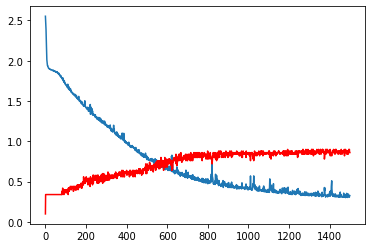

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'], 'r-')
plt.show()